# **TD5**

# **Partie 1: PCA**

In [ ]:
#On prend un dataset de mail (spam or not)
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
df1 = pd.read_csv('/content/drive/My Drive/DataSet/SMS/SMS_train.csv.xls', sep=',', encoding='latin-1', usecols=['Message_body','Label'])
df2 = pd.read_csv('/content/drive/My Drive/DataSet/SMS/SMS_test.csv.xls', sep=',', encoding='latin-1', usecols=['Message_body','Label'])
df = pd.concat([df1, df2])
df.reset_index(drop=True, inplace=True)
df.dropna()
df.reset_index(drop=True, inplace=True)
df.head(4)

,Message_body,Label
0,Rofl. Its true to its name,Non-Spam
1,The guy did some bitching but I acted like i'd...,Non-Spam
2,"Pity, * was in mood for that. So...any other s...",Non-Spam
3,Will ü b going to esplanade fr home?,Non-Spam


In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('words')
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
import string
import re
from sklearn.model_selection import cross_validate
from nltk.corpus import words
 
stopwords = set(stopwords.words('english')) #on met set les stopwords en anglais
dictionary = set(words.words())
rmv_punct = str.maketrans('','',string.punctuation) #setting of the punctuation removal
lemmatizer = WordNetLemmatizer() #définition du lemmatizer
 
# Function : to preprocess words
# Parameter : textParam, text ; lem1Stem2, int, if =2 then we apply a stemmatization else a lemmatisation
# Returns : list of the most meaningful words (preprocessed)
def preProcessing(textParam):
  result = []
  items = textParam
  if (type(items)!=float):
    items = textParam.lower() #transform to lower case
    items = items.translate(rmv_punct) #remove punctuation
    items = re.sub(r'\d+','',items) #remove numbers
    tokens = word_tokenize(items) #tokenize words
    tok = [i for i in tokens if not i in stopwords] # list of the words in the text without stop words
    for w in tok:
      result.append(lemmatizer.lemmatize(w)) #lemmatisation
    i=0
    while i < len(result):
      if result[i] not in dictionary:
        result.remove(result[i])
      else:
        i=i+1
    return (result)
 

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
mail = [] #liste pour le corps des mails
mailLabel = [] #liste pour les spam ou non
t = len(df['Message_body'])
for i in range(1,t):
    #On lemmatize seulement les mail, ce qui nous donne des listes de tokens
    tokenList = preProcessing(df['Message_body'][i])
    
    mail.append(' '.join(tokenList)) #on transforme chaque listes de tokens en phrases
    if df['Label'][i] == "Non-Spam":
      mailLabel.append(0)
    else:
      mailLabel.append(1)

In [ ]:
len(mail) == len(mailLabel)

True

In [ ]:
print(mail[0], "---", mailLabel[0])

guy like id interested something else next week gave u free --- 0


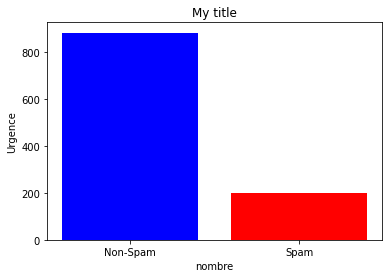

In [ ]:
# librairies
import numpy as np
import matplotlib.pyplot as plt

count=0
for i in range(len(mailLabel)):
    if mailLabel[i] == 0:
        count+=1

 
# Fake dataset
height = [count,len(mailLabel)-count]
bars = ('Non-Spam', 'Spam')
y_pos = np.arange(len(bars))
 
# Create bars and choose color
plt.bar(y_pos, height, color = ('blue','red'))
 
# Add title and axis names
plt.title('My title')
plt.xlabel('nombre')
plt.ylabel('Urgence')
 
# Limits for the Y axis
#plt.ylim(0,60)
# 
# Create names
plt.xticks(y_pos, bars)
 
# Show graphic
plt.show()

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
wordVectorized = vectorizer.fit_transform(mail)

print(vectorizer.get_feature_names())
print(wordVectorized.toarray())

['aa', 'abdomen', 'able', 'absolutely', 'abstract', 'accent', 'access', 'accident', 'accidentally', 'account', 'activity', 'actually', 'ad', 'add', 'added', 'address', 'admirer', 'admission', 'adore', 'adult', 'adventure', 'advice', 'advise', 'advisor', 'ae', 'afraid', 'aft', 'afternoon', 'afterwards', 'age', 'ago', 'ah', 'aha', 'airport', 'al', 'album', 'alive', 'almost', 'alone', 'along', 'already', 'alright', 'also', 'always', 'amazing', 'amount', 'amt', 'amused', 'amy', 'an', 'angry', 'animation', 'announcement', 'another', 'answer', 'antibiotic', 'anybody', 'anyone', 'anything', 'anyway', 'apparently', 'apply', 'arcade', 'area', 'arent', 'argue', 'argument', 'arm', 'around', 'arrange', 'arsenal', 'art', 'as', 'ash', 'ask', 'asleep', 'assessment', 'assistance', 'assume', 'astrology', 'astronomer', 'ate', 'attached', 'attempt', 'attend', 'attention', 'auction', 'audition', 'august', 'available', 'ave', 'await', 'awake', 'award', 'away', 'awesome', 'awkward', 'babe', 'baby', 'back', 

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(wordVectorized.toarray(), mailLabel, test_size=0.2)

## **Sans PCA**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

#importation du GridSearch pour trouver les meilleurs paramètres
from sklearn.model_selection import GridSearchCV

#importation des packages pour déterminer le score des modèles
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

RF = RandomForestClassifier()
param = {'n_estimators': [10, 150, 300],
            'max_depth': [30, 60, 90, None]
            }

gs = GridSearchCV(RF, param, cv=5, n_jobs=-1) #n_jobs=-1 pour qu'il effectue l'apprentissage en parallèlle
gs_fit = gs.fit(wordVectorized, mailLabel)
#print(gs.best_estimator_)

rf = gs.best_estimator_
rf.fit(X_train, y_train)
pred = rf.predict(X_test)

In [ ]:
print('score : ', rf.score(X_test, y_test))
tn, fp, fn, tp = confusion_matrix(y_test, pred).ravel()
print('True Positives: ', tp)
print('False Positives: ', fp)
print('True Negatives: ', tn)
print('False Negatives: ', fn)
print(classification_report(y_test, pred))

score :  0.9493087557603687
True Positives:  27
False Positives:  1
True Negatives:  179
False Negatives:  10
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       180
           1       0.96      0.73      0.83        37

    accuracy                           0.95       217
   macro avg       0.96      0.86      0.90       217
weighted avg       0.95      0.95      0.95       217



## **Avec PCA**

In [ ]:
from sklearn.decomposition import PCA

#Make an instance of the model
pca = PCA(.95)

In [ ]:
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [ ]:
X_train_PCA = pca.transform(X_train)
X_test_PCA = pca.transform(X_test)
y_train_PCA = y_train
y_test_PCA = y_test

In [ ]:
from sklearn.ensemble import RandomForestClassifier

#importation du GridSearch pour trouver les meilleurs paramètres
from sklearn.model_selection import GridSearchCV

#importation des packages pour déterminer le score des modèles
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

RF = RandomForestClassifier()
param = {'n_estimators': [10, 150, 300],
            'max_depth': [30, 60, 90, None]
            }

gs = GridSearchCV(RF, param, cv=5, n_jobs=-1) #n_jobs=-1 pour qu'il effectue l'apprentissage en parallèlle
gs_fit = gs.fit(wordVectorized, mailLabel)
#print(gs.best_estimator_)

rf_PCA = gs.best_estimator_
rf_PCA.fit(X_train_PCA, y_train_PCA)
pred_PCA = rf_PCA.predict(X_test_PCA)

print('score : ', rf_PCA.score(X_test_PCA, y_test_PCA))
tn, fp, fn, tp = confusion_matrix(y_test_PCA, pred_PCA).ravel()
print('True Positives: ', tp)
print('False Positives: ', fp)
print('True Negatives: ', tn)
print('False Negatives: ', fn)
print(classification_report(y_test_PCA, pred_PCA))

score :  0.9216589861751152
True Positives:  23
False Positives:  3
True Negatives:  177
False Negatives:  14
              precision    recall  f1-score   support

           0       0.93      0.98      0.95       180
           1       0.88      0.62      0.73        37

    accuracy                           0.92       217
   macro avg       0.91      0.80      0.84       217
weighted avg       0.92      0.92      0.92       217



## **PCA Comparison**

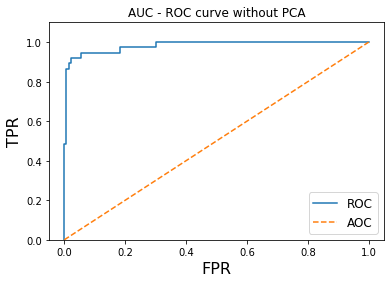

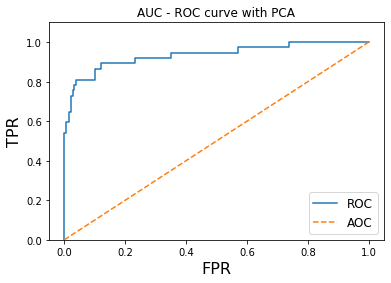

In [ ]:
metrics.plot_roc_curve(rf, X_test, y_test, label='ROC') 
plt.plot(np.linspace(0, 1, 2), linestyle='--', label='AOC')
plt.legend(fontsize=12)
plt.ylabel('TPR', fontsize=16)
plt.xlabel('FPR', fontsize=16)
#plt.xlim((0, 0.5))
plt.ylim((0, 1.1))
plt.title("AUC - ROC curve without PCA")
plt.show()

metrics.plot_roc_curve(rf_PCA, X_test_PCA, y_test_PCA, label='ROC') 
plt.plot(np.linspace(0, 1, 2), linestyle='--', label='AOC')
plt.legend(fontsize=12)
plt.ylabel('TPR', fontsize=16)
plt.xlabel('FPR', fontsize=16)
#plt.xlim((0, 0.5))
plt.ylim((0, 1.1))
plt.title("AUC - ROC curve with PCA")
plt.show()
